# Plots for the GALAH DR4 Paper

Author: Sven Buder (ANU, sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-Catalogues" data-toc-modified-id="Read-in-Catalogues-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in Catalogues</a></span></li><li><span><a href="#Target-Information" data-toc-modified-id="Target-Information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Target Information</a></span><ul class="toc-item"><li><span><a href="#How-many-Open-Cluster?" data-toc-modified-id="How-many-Open-Cluster?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>How many Open Cluster?</a></span></li><li><span><a href="#How-many-Globular-Cluster?" data-toc-modified-id="How-many-Globular-Cluster?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>How many Globular Cluster?</a></span></li><li><span><a href="#How-many-large-survey-targets?" data-toc-modified-id="How-many-large-survey-targets?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>How many large survey targets?</a></span></li><li><span><a href="#Skymap" data-toc-modified-id="Skymap-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Skymap</a></span></li></ul></li><li><span><a href="#Flag_SP" data-toc-modified-id="Flag_SP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Flag_SP</a></span></li><li><span><a href="#Zero-Point-shifts" data-toc-modified-id="Zero-Point-shifts-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Zero Point shifts</a></span></li></ul></div>

In [2]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.table import Table, join
from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

## Read in Catalogues

In [4]:
# GALAH DR4 allstar and allspec
galah_dr4_allstar = Table.read('../catalogs/galah_dr4_allstar.fits')
galah_dr4_allspec = Table.read('../catalogs/galah_dr4_allspec.fits')

In [7]:
# GALAH DR3 allstar for reference
galah_dr3_allstar = Table.read('/Users/buder/GALAH_DR3/catalogs/GALAH_DR3_main_allstar_v2.fits')

In [8]:
# Open and Globular Cluster membership catalogues
ocs = Table.read('../auxiliary_information/CantatGaudin_2020_AandA_640_1.fits')
gcs = Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_cluster_source_id_memberprob0p7.fits')

# prepare joining with common keys
ocs['gaiadr3_source_id'] = ocs['GaiaDR2']
gcs['gaiadr3_source_id'] = gcs['source_id']

# join
ocs_dr4 = join(ocs, galah_dr4_allstar, keys = 'gaiadr3_source_id')
gcs_dr4 = join(gcs, galah_dr4_allstar, keys = 'gaiadr3_source_id')

## Target Information

### How many Open Cluster?

In [14]:
nr_clusters = len(np.unique(ocs_dr4['Cluster']))
nr_clusters_above_5members = 0

for unique_oc in np.unique(ocs_dr4['Cluster']):
    match = len(np.where(unique_oc == ocs_dr4['Cluster'])[0])
    if match >= 5:
        nr_clusters_above_5members +=  1
    
print('OCs: '+str(nr_clusters)+' ('+str(nr_clusters_above_5members)+' with 5+ members)')

print('OC members in total: '+str(len(ocs_dr4['sobject_id'])))

OCs: 361 (109 with 5+ members)
OC members in total: 3756


### How many Globular Cluster?

In [15]:
nr_clusters = len(np.unique(gcs_dr4['cluster']))
nr_clusters_above_5members = 0

for unique_gc in np.unique(gcs_dr4['cluster']):
    match = len(np.where(unique_gc == gcs_dr4['cluster'])[0])
    if match >= 5:
        nr_clusters_above_5members +=  1
    
print('GCs: '+str(nr_clusters)+' ('+str(nr_clusters_above_5members)+' with 5+ members)')

print('GC members in total: '+str(len(gcs_dr4['sobject_id'])))

GCs: 30 (23 with 5+ members)
GC members in total: 2509


### How many large survey targets?

In [22]:
total_targets = len(galah_dr4_allstar['sobject_id'])

for survey in [
    'galah_bright',
    'galah_main',
    'galah_faint',
    'galah_phase2',
    'k2_hermes',
    'tess_hermes',
    'globular clusters',
    'open clusters',
    'commissioning',
    'others'
]:
    
    if survey == 'globular clusters':
        target_number = len(gcs_dr4['sobject_id']) # matched with Vasiliev and Baumgardt (2021) members
        total_targets -= target_number
    elif survey == 'open clusters':
        target_number = len(ocs_dr4['sobject_id']) # matched with Cantat-Gaudin et al. (2020) members
        total_targets -= target_number
    elif survey == 'commissioning':
        target_number = 2625
        total_targets -= target_number
    else:
        if survey == 'others':
            target_number = total_targets # the remaining targets
        else:
            target_number = len(np.where(galah_dr4_allstar['survey_name'] == survey)[0])
            total_targets -= target_number
    
    print(survey, target_number)

galah_bright 67680
galah_main 434901
galah_faint 33907
galah_phase2 172494
k2_hermes 117736
tess_hermes 37129
globular clusters 2509
open clusters 3756
commissioning 2625
others 44851


### Skymap

In [25]:
# Put ra/dec coordinates into SkyCoord and to l/b
coordinates = SkyCoord(frame=ICRS, ra=galah_dr4_allstar['ra']*u.deg, dec=galah_dr4_allstar['dec']*u.deg)
galah_dr4_l = coordinates.galactic.l.wrap_at(180 * u.deg).radian
galah_dr4_b = coordinates.galactic.b.radian

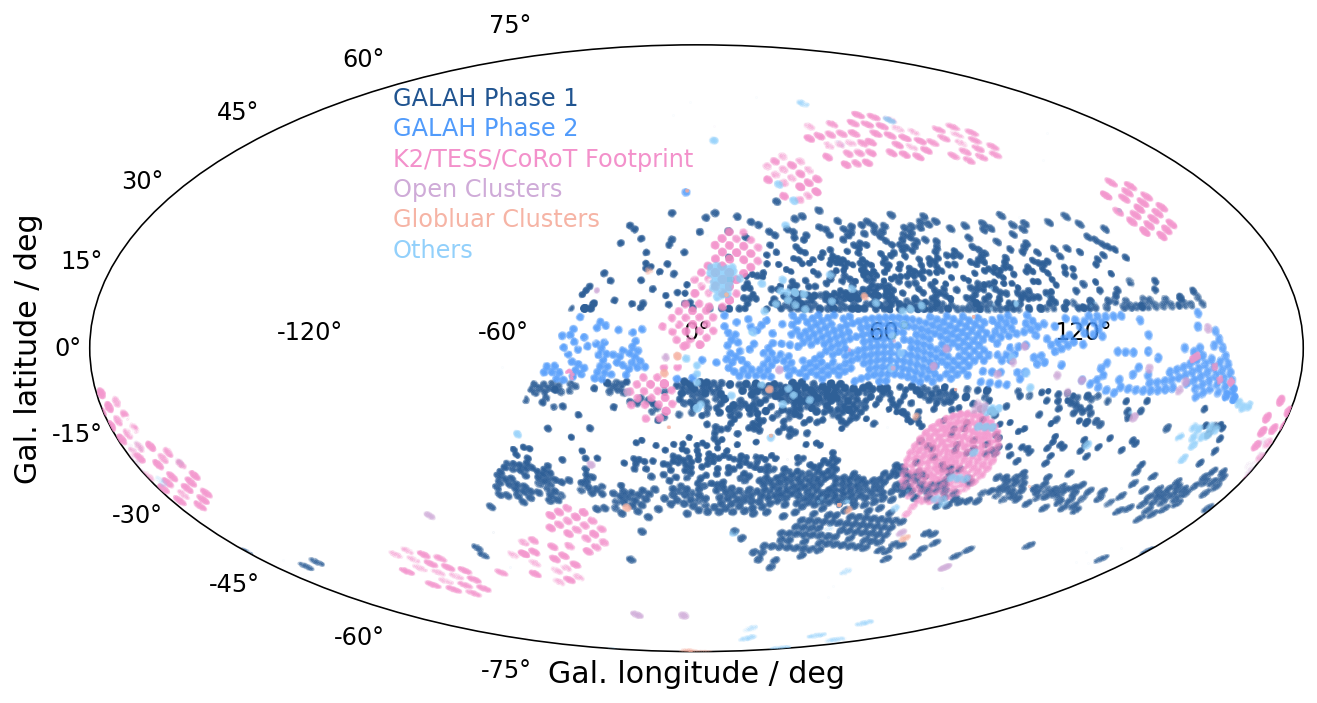

In [101]:
unique_surveys = np.unique(galah_dr4_allstar['survey_name'])

fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111, projection='aitoff')

survey_colors = ['#205490','#519BFB','#F391CB','#CFABD8','#F6B4A5','#92D0FB']

survey_labels = ['GALAH Phase 1','GALAH Phase 2','K2/TESS/CoRoT Footprint','Open Clusters','Globluar Clusters','Others']

for unique_survey in unique_surveys:
    
    use = (galah_dr4_allstar['survey_name'] == unique_survey)

    if unique_survey in ['galah_bright','galah_main','galah_faint']:
        
        survey_color = survey_colors[0]
        survey_label = survey_labels[0]
        survey_zorder = 1
        
    elif unique_survey == 'galah_phase2':
        
        survey_color = survey_colors[1]
        survey_label = survey_labels[1]
        survey_zorder = 2

    elif unique_survey in ['tess_hermes','k2_hermes','corot']:
        
        survey_color = survey_colors[2]
        survey_label = survey_labels[2]
        survey_zorder = 3

    elif unique_survey in ['Alessi_13','Berkeley_32','Berkeley_33','Berkeley_73','Blanco_1','Collinder_135','Collinder_140','Collinder_261','IC_2391','IC_2395','IC_2602','IC_4665','Melotte_22','Melotte_25','NGC_1252','NGC_2204','NGC_2232','NGC_2451','NGC_2516','NGC_2682','NGC_3293_NGC_3324','NGC_5617_Trumpl22','NGC_6253','NGC_6583','NGC_6994','NGC_7772','NGC_7826','Ruprecht_147','Trumpler_10','Trumpler_20']:

        survey_color = survey_colors[3]
        survey_label = survey_labels[3]
        survey_zorder = 5

    elif unique_survey in ['E_3','NGC_104_47Tuc','NGC_1261','NGC_1851','NGC_2808','NGC_288','NGC_3201','NGC_362','NGC_5139_oCen','NGC_5904_M_5','NGC_6121_M_4','NGC_6254_M_10','NGC_6397','NGC_6544','NGC_6656_M_22','NGC_6752','NGC_6809_M_55','NGC_7099']:

        survey_color = survey_colors[4]
        survey_label = survey_labels[4]
        survey_zorder = 6
    
    else:
        
        survey_color = survey_colors[5]
        survey_label = survey_labels[5]
        survey_zorder = 4

    s1=ax.scatter(
        -galah_dr4_l[use],
        galah_dr4_b[use],
        c = survey_color,
        rasterized=True,
        alpha = 0.1,
        s = 0.05,
        zorder = survey_zorder
    )
    

for survey_index in range(len(survey_labels)):
    
    ax.text(
        0.25,0.9-0.05*survey_index,
        survey_labels[survey_index],
        color=survey_colors[survey_index],transform=ax.transAxes,ha='left',
        fontsize=12
    )

# make everything transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set ticks, labels, and spine colors to white
ax.set_xticks([-2,-1,0,1,2], fontsize=20, zorder=7)
ax.tick_params(colors='white', labelsize=12, zorder=7)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_xlabel('Gal. longitude / deg',fontsize=15, color='white')
ax.set_ylabel('Gal. latitude / deg',fontsize=15, color='white')
plt.tight_layout()
plt.savefig('figures/galah_dr4_skymap_transparent.png',dpi=300,bbox_inches='tight')

# Set ticks, labels, and spine colors to white
ax.tick_params(colors='k', labelsize=12, zorder=7)
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('white')
ax.set_xlabel('Gal. longitude / deg',fontsize=15, color='k')
ax.set_ylabel('Gal. latitude / deg',fontsize=15, color='k')
plt.tight_layout()
plt.savefig('figures/galah_dr4_skymap_standalone.png',dpi=300,bbox_inches='tight')

plt.show()
plt.close()

In [ ]:



plt.tight_layout()

## Flag_SP

In [ ]:
dr4_allstar = Table.read('/Users/buder/GALAH_DR4/catalogs/galah_dr4_allstar_240705.fits')
dr4_allspec = Table.read('/Users/buder/GALAH_DR4/catalogs/galah_dr4_allspec_240705.fits')

In [ ]:
# astrometric information from Gaia DR3?
dr4_allstar_with_parallax = len(dr4_allstar['gaiadr3_source_id'][np.isfinite(dr4_allstar['parallax'])])
print('Stars with parallax: ', dr4_allstar_with_parallax, np.round(100*dr4_allstar_with_parallax/len(dr4_allstar['parallax'])))

# RVs from Gaia DR3?
dr4_allstar_with_gaia_rv = len(dr4_allstar['gaiadr3_source_id'][np.isfinite(dr4_allstar['rv_gaia_dr3'])])
print('Stars with parallax: ', dr4_allstar_with_gaia_rv, np.round(100*dr4_allstar_with_gaia_rv/len(dr4_allstar['parallax'])))

# Average parallax uncertainty?
parallax_perc = np.nanpercentile(np.array(100*dr4_allstar['parallax_error']/dr4_allstar['parallax']),q=[16,50,84])
print('Parallax uncertainty: r$'+str(np.round(parallax_perc[1],1))+'_{-'+str(np.round(parallax_perc[1]-parallax_perc[0],1))+'}^{+'+str(np.round(parallax_perc[2]-parallax_perc[1],1))+'}$')

In [ ]:
dr4_allstar_total = len(dr4_allstar)
dr4_allspec_total = len(dr4_allspec)

dr4_allstar_total, dr4_allspec_total

In [ ]:
import pickle
a_file = open("../spectrum_post_processing/final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()
flag_sp_dictionary

In [ ]:
# File path to save the LaTeX file
file_path = '../galah_dr4_paper/tables/flag_sp_statistics.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table}[ht]' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{List of major quality flag \texttt{flag\_sp} listing the bit, description and how often the flag was raised for the \textit{allstar} and \textit{allspec} routines. Notes: Multiple bits can be raised for each of the 1\,085\,520 spectra spectra of the  of 917\,588 stars.}' + '\n')
    f.write(r'\label{tab:flag_sp}' + '\n')
    f.write(r'\begin{tabular}{ccccc}' + '\n')
    f.write(r'\hline \hline' + '\n')
    f.write(r'Raised Bit & Flag & Description & \textit{allstar} & \textit{allspec} \\' + '\n')
    f.write(r'\hline' + '\n')
    
    f.write(r'  & 0 & No flag & '+str(len(np.where(dr4_allspec['flag_sp']==0)[0]))+r' & '+str(len(np.where(dr4_allstar['flag_sp']==0)[0]))+r' \\'+' \n')
    
    for flag in np.arange(15):
        if flag == 0:  text = 'Emission'
        if flag == 1:  text = 'CCD missing'
        if flag == 2:  text = 'Spectr. Binary 1'
        if flag == 3:  text = 'Spectr. Binary 2'
        if flag == 4:  text = r'$\chi^2 > 3\sigma$'
        if flag == 5:  text = r'\vsini warning'
        if flag == 6:  text = r'\vmic warning'
        if flag == 7:  text = 'Triple Binary warning'
        if flag == 8:  text = r'\Teff warning'
        if flag == 9:  text = r'\logg warning'
        if flag == 10: text = r'\feh warning'
        if flag == 11: text = 'S/N low'
        if flag == 12: text = 'Not converged'
        if flag == 13: text = 'Model extrapolated'
        if flag == 14: text = 'No Results'
            
#         check = np.where((dr4_allspec['flag_sp'] & 2**flag) != 0)[0]
#         print(flag, 2**flag, dr4_allspec['flag_sp'][check])

        raised_in_allspec = str(len(np.where((dr4_allspec['flag_sp'] & 2**flag) != 0)[0]))
        raised_in_allstar = str(len(np.where((dr4_allstar['flag_sp'] & 2**flag) != 0)[0]))

        f.write(str(flag)+r' & '+str(2**flag)+' & '+text+' & '+ raised_in_allspec + ' & '+ raised_in_allstar +r' \\' + '\n')
                
    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table}')

## Zero Point shifts

In [ ]:
zeropoints.keys()

In [ ]:
zeropoints = Table.read('../catalogs/galah_dr4_zeropoints_240705.fits')

rows = len(zeropoints)

    
    
# File path to save the LaTeX file
file_path = '../galah_dr4_paper/tables/zeropoints_allstar.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table}[ht]' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{Zero point corrections applied to the \texttt{allstar} measurements. We used \citet{Prsa2016} as reference for Solar parameters and \citet{Grevesse2007} as reference for Solar abundances.}' + '\n')
    f.write(r'\label{tab:zeropoints}' + '\n')
    f.write(r'\begin{tabular}{cccccc}' + '\n')
    f.write(r'\hline \hline' + '\n')
    f.write(r'Proporty & Reference & Zeropoint & Shift & Vesta & Vesta Shift \\' + '\n')
    f.write(r'\hline' + '\n')
    
    for row in range(rows):
        label = str(zeropoints['label'][row])
        if label == 'teff':
            label = r'\Teff'
        if label == 'logg':
            label = r'\logg'
        if label == 'fe_h':
            label = r'\feh'
        if label == 'vmic':
            label = r'\vmic'
        if label == 'vsini':
            label = r'\vsini'
        if label[:2] == 'a_':
            if len(label) > 3:
                label = r'A('+label[2].upper()+label[3]+')'
            else:
                label = r'A('+label[2].upper()+')'
        f.write(label+r' & '+str(zeropoints['solar_G07'][row])+' & '+str(zeropoints['zeropt_allstar'][row])+' & '+str(zeropoints['shift_allstar'][row])+' & '+str(zeropoints['vesta_allstar'][row])+' & '+str(zeropoints['d_vesta_allstar'][row])+r' \\' + '\n')
                
    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table}')


In [ ]:
from scipy.stats import binned_statistic_2d

f, gs = plt.subplots(1,3,figsize=(10,3.5))

useful = (
    (dr4_allstar['flag_sp'] == 0) &
    (dr4_allstar['flag_c_fe'] == 0) &
    (dr4_allstar['flag_n_fe'] == 0) &
    np.isfinite(dr4_allstar['mass'])
)

ax = gs[0]
ax.set_xlabel('Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.set_ylabel('GALAH DR4 [C/N]',fontsize=15)
h = ax.hist2d(
    dr4_allstar['mass'][useful],
    dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
    bins = (np.linspace(0.5,3.5,100),np.linspace(-1,1,100)),
    norm = LogNorm(),
    cmap = 'plasma'
);
cbar = plt.colorbar(h[-1],ax=ax, orientation = 'horizontal',pad=0.2)
cbar.set_label('Nr. Stars',fontsize=15)

# Second panel: 2D histogram (binned stats) colored by median
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
    dr4_allstar['teff'][useful],
    dr4_allstar['logg'][useful],
    dr4_allstar['mass'][useful],
    statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
)

ax = gs[1]
ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu',vmin = 0.75, vmax = 2.5)
cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
cbar.set_label('Median Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.invert_xaxis()
ax.invert_yaxis()


# Second panel: 2D histogram (binned stats) colored by median
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
    dr4_allstar['teff'][useful],
    dr4_allstar['logg'][useful],
    dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
    statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
)

ax = gs[2]
ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu', vmin = -0.5, vmax = 0.25)
cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
cbar.set_label('Median GALAH DR4 [C/N]',fontsize=15)
ax.invert_xaxis()
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../galah_dr4_paper/figures/cn_mass.png',dpi=200,bbox_inches='tight')

In [ ]:
from scipy.stats import binned_statistic_2d

f, gs = plt.subplots(1,3,figsize=(10,3.5))

useful = (
    (dr4_allstar['flag_sp'] == 0) &
    (dr4_allstar['flag_c_fe'] == 0) &
    (dr4_allstar['flag_n_fe'] == 0) &
    np.isfinite(dr4_allstar['age'])
)

ax = gs[0]
ax.set_xlabel('Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.set_ylabel('GALAH DR4 [C/N]',fontsize=15)
h = ax.hist2d(
    np.log10(dr4_allstar['age'][useful]*10**9),
    dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
    bins = (np.linspace(8.2,10.2,100),np.linspace(-1,1,100)),
    norm = LogNorm(),
    cmap = 'plasma'
);
cbar = plt.colorbar(h[-1],ax=ax, orientation = 'horizontal',pad=0.2)
cbar.set_label('Nr. Stars',fontsize=15)

# # Second panel: 2D histogram (binned stats) colored by median
# bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
#     dr4_allstar['teff'][useful],
#     dr4_allstar['logg'][useful],
#     dr4_allstar['age'][useful],
#     statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
# )

# ax = gs[1]
# ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
# ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

# im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
#                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
#                    cmap='RdYlBu',vmin = 0.75, vmax = 2.5)
# cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
# cbar.set_label('Median Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
# ax.invert_xaxis()
# ax.invert_yaxis()


# # Second panel: 2D histogram (binned stats) colored by median
# bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
#     dr4_allstar['teff'][useful],
#     dr4_allstar['logg'][useful],
#     dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
#     statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
# )

# ax = gs[2]
# ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
# ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

# im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
#                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
#                    cmap='RdYlBu', vmin = -0.5, vmax = 0.25)
# cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
# cbar.set_label('Median GALAH DR4 [C/N]',fontsize=15)
# ax.invert_xaxis()
# ax.invert_yaxis()

# plt.tight_layout()
# plt.savefig('../galah_dr4_paper/figures/cn_mass.png',dpi=200,bbox_inches='tight')